# Data Preprocessing

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('/content/data_clean.csv')

## Data Exploration

In [3]:
dataset.head()

,male,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approval_status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [4]:
dataset.shape

(690, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             690 non-null    object 
 1   age              690 non-null    float64
 2   debt             690 non-null    float64
 3   married          690 non-null    object 
 4   bank_customer    690 non-null    object 
 5   education_level  690 non-null    object 
 6   ethnicity        690 non-null    object 
 7   years_employed   690 non-null    float64
 8   prior_default    690 non-null    object 
 9   employed         690 non-null    object 
 10  credit_score     690 non-null    int64  
 11  drivers_license  690 non-null    object 
 12  citizen          690 non-null    object 
 13  zip_code         690 non-null    object 
 14  income           690 non-null    int64  
 15  approval_status  690 non-null    int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


In [6]:
dataset.select_dtypes(include='object').columns

Index(['male', 'married', 'bank_customer', 'education_level', 'ethnicity',
       'prior_default', 'employed', 'drivers_license', 'citizen', 'zip_code'],
      dtype='object')

In [7]:
len(dataset.select_dtypes(include='object').columns)

10

In [8]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'debt', 'years_employed', 'credit_score', 'income',
       'approval_status'],
      dtype='object')

In [9]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

6

In [10]:
dataset.describe()

,age,debt,years_employed,credit_score,income,approval_status
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,1017.385507,0.444928
std,11.853273,4.978163,3.346513,4.86294,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.670000,1.000000,0.165000,0.00000,0.000000,0.000000
50%,28.625000,2.750000,1.000000,0.00000,5.000000,0.000000
75%,37.707500,7.207500,2.625000,3.00000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,100000.000000,1.000000


## Dealing with Missing Data

In [11]:
dataset.isnull().values.sum()

0

In [12]:
dataset.isnull().values.any()

False

## Encoding Categorical Data

In [13]:
dataset.select_dtypes(include='object').columns

Index(['male', 'married', 'bank_customer', 'education_level', 'ethnicity',
       'prior_default', 'employed', 'drivers_license', 'citizen', 'zip_code'],
      dtype='object')

In [14]:
dataset.head()

,male,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,drivers_license,citizen,zip_code,income,approval_status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,1


In [15]:
dataset = dataset.drop(columns=['drivers_license',	'zip_code'])

In [16]:
dataset.head()

,male,age,debt,married,bank_customer,education_level,ethnicity,years_employed,prior_default,employed,credit_score,citizen,income,approval_status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,g,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,g,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,g,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,g,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,s,0,1


In [17]:
dataset2 = pd.get_dummies(data=dataset, drop_first=True)
dataset2.head()

,age,debt,years_employed,credit_score,income,approval_status,male_b,married_l,married_u,married_y,...,ethnicity_h,ethnicity_j,ethnicity_n,ethnicity_o,ethnicity_v,ethnicity_z,prior_default_t,employed_t,citizen_p,citizen_s
0,30.83,0.000,1.25,1,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
1,58.67,4.460,3.04,6,560,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,24.50,0.500,1.50,0,824,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,27.83,1.540,3.75,5,3,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [18]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 690 non-null    float64
 1   debt                690 non-null    float64
 2   years_employed      690 non-null    float64
 3   credit_score        690 non-null    int64  
 4   income              690 non-null    int64  
 5   approval_status     690 non-null    int64  
 6   male_b              690 non-null    uint8  
 7   married_l           690 non-null    uint8  
 8   married_u           690 non-null    uint8  
 9   married_y           690 non-null    uint8  
 10  bank_customer_g     690 non-null    uint8  
 11  bank_customer_gg    690 non-null    uint8  
 12  bank_customer_p     690 non-null    uint8  
 13  education_level_b   690 non-null    uint8  
 14  education_level_c   690 non-null    uint8  
 15  education_level_cc  690 non-null    uint8  
 16  educatio

## Countplot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


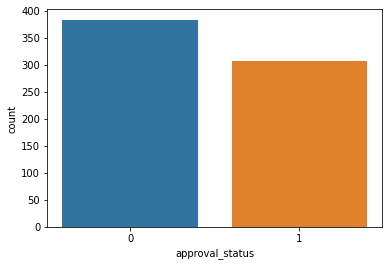

In [19]:
_ = sns.countplot(dataset['approval_status'])
_ = plt.plot()

In [20]:
dataset_3 = dataset2.drop(columns='approval_status')

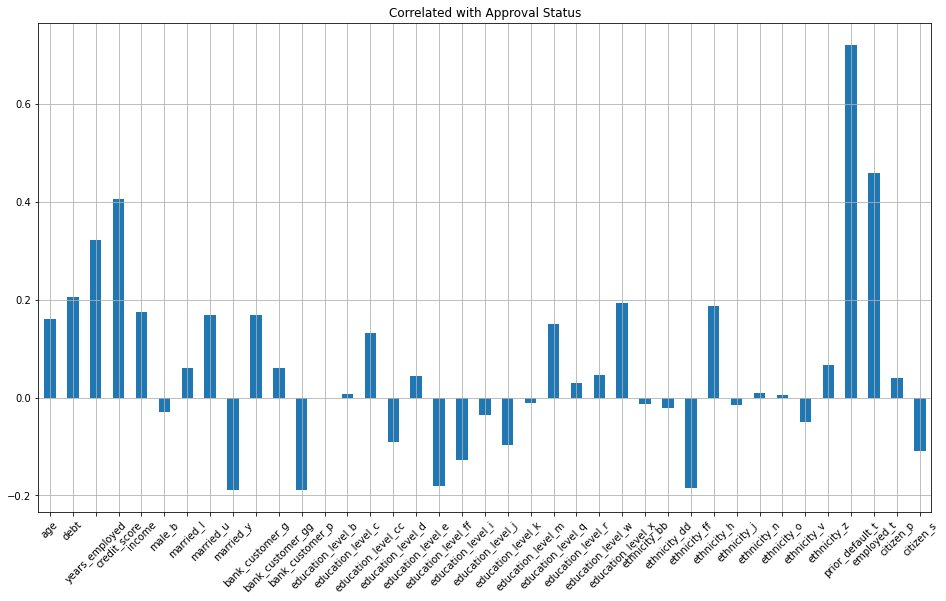

In [21]:
dataset_3.corrwith(dataset2['approval_status']).plot.bar(
    figsize=(16,9), title='Correlated with Approval Status', rot=45, grid=True
)

In [22]:
corr = dataset2.corr()

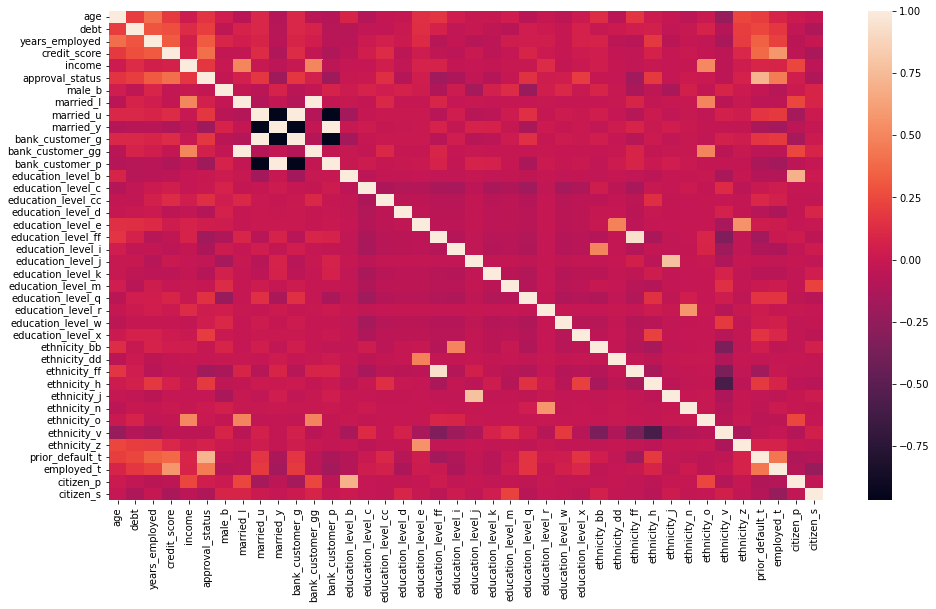

In [23]:
plt.figure(figsize=(16,9))
sns.heatmap(corr)

## Splitting the Dataset

In [24]:
dataset2.head()

,age,debt,years_employed,credit_score,income,approval_status,male_b,married_l,married_u,married_y,...,ethnicity_h,ethnicity_j,ethnicity_n,ethnicity_o,ethnicity_v,ethnicity_z,prior_default_t,employed_t,citizen_p,citizen_s
0,30.83,0.000,1.25,1,0,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
1,58.67,4.460,3.04,6,560,1,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
2,24.50,0.500,1.50,0,824,1,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,27.83,1.540,3.75,5,3,1,1,0,1,0,...,0,0,0,0,1,0,1,1,0,0
4,20.17,5.625,1.71,0,0,1,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1


In [25]:
# Independent / matrix of features
X = dataset2.drop(columns='approval_status').values

In [26]:
# Target / dependent variable
y = dataset2['approval_status'].values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X_train.shape, y_train.shape)

(552, 39) (552,)


In [29]:
print(X_test.shape, y_test.shape)

(138, 39) (138,)


## Feature Scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [31]:
X_train

array([[0.16285714, 0.51262578, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.2318797 , 0.13290298, 0.175     , ..., 1.        , 0.        ,
        0.        ],
       [0.39218045, 0.01898614, 0.0125    , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.35834586, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.07894737, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.07398496, 0.1898614 , 0.01875   , ..., 1.        , 0.        ,
        0.        ]])

In [32]:
X_test

array([[0.26794242, 0.05695842, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.48496241, 0.15188912, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09398496, 0.        , 0.025     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.41233083, 0.24681982, 0.025     , ..., 1.        , 0.        ,
        0.        ],
       [0.21428571, 0.07594456, 0.20825   , ..., 1.        , 0.        ,
        0.        ],
       [0.21684211, 0.01423961, 0.02925   , ..., 1.        , 0.        ,
        0.        ]])

# Building the Model

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

y_pred = logreg.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143


In [35]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[54 14]
 [10 60]]


### Cross-Validation

In [36]:
from sklearn.model_selection import KFold, cross_val_score

kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(logreg, X_train, y_train, cv=kf)

print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.8625 0.048049150936490606
[0.77918019 0.93727273]


## Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index=True)

results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143
1,Random Forest,0.847826,0.844444,0.876923,0.814286


In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[60  8]
 [13 57]]


### Cross-Validation

In [41]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(rf, X_train, y_train, cv=kf)

print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.8659415584415585 0.05149527723327409
[0.78590909 0.94136364]


## XGBoost

In [42]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [43]:
y_pred = xgb.predict(X_test)

In [44]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143
1,Random Forest,0.847826,0.844444,0.876923,0.814286
2,XGBoost,0.840580,0.840580,0.852941,0.828571


In [45]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58 10]
 [12 58]]


### Cross-Validation

In [46]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(xgb, X_train, y_train, cv=kf)

print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.8497077922077922 0.04118655902874258
[0.78590909 0.91909091]


## KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
y_pred = knn.predict(X_test)

In [50]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['KNN', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])

results = results.append(model_results, ignore_index=True)

results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143
1,Random Forest,0.847826,0.844444,0.876923,0.814286
2,XGBoost,0.840580,0.840580,0.852941,0.828571
3,KNN,0.811594,0.803030,0.854839,0.757143


In [51]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59  9]
 [17 53]]


### Cross-Validation

In [58]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(knn, X_train, y_train, cv=kf)

print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.8660064935064936 0.06955240394783817
[0.77099838 0.94165584]


## Decision Tree

In [54]:
# Use the default and check performance
from sklearn import tree

tree = tree.DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [55]:
y_pred = tree.predict(X_test)

In [56]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Decision Tree', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143
1,Random Forest,0.847826,0.844444,0.876923,0.814286
2,XGBoost,0.840580,0.840580,0.852941,0.828571
3,KNN,0.811594,0.803030,0.854839,0.757143
4,Decision Tree,0.782609,0.776119,0.812500,0.742857


In [57]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[56 12]
 [18 52]]


### Cross-Validation

In [59]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(tree, X_train, y_train, cv=kf)

print(np.mean(cv_scores), np.std(cv_scores))
print(np.quantile(cv_scores, [0.025, 0.975]))

0.8188311688311687 0.04505787024977363
[0.73640422 0.88732955]


## Model Deicision

We elect to go with the random forest model as our final model.

# Search to Find the Best Parameters (Random Forest)

In [62]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


We will try to adjust the following set of hyperparameters:

* `n_estimators` = number of trees in the foreset
* `max_features` = max number of features considered for splitting a node
* `max_depth` = max number of levels in each decision tree
* `min_samples_split` = min number of data points placed in a node before the node is split
* `min_samples_leaf` = min number of data points allowed in a leaf node
* `bootstrap` = method for sampling data points (with or without replacement)

In [63]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [64]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [69]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 300}

In [72]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=300)

In [70]:
grid_search.best_score_

0.875

In [74]:
clf = RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=300, random_state=42)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=5,
                       min_samples_split=8, n_estimators=300, random_state=42)

In [76]:
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Random Forest', acc, f1, prec, rec]],
                       columns=['Model', "Accuracy", 'F1', 'Precision', 'Recall'])
results = results.append(model_results, ignore_index=True)
results

,Model,Accuracy,F1,Precision,Recall,F1 Score
0,Logistic Regression,0.826087,0.833333,0.810811,0.857143,NaN
1,Random Forest,0.847826,0.844444,0.876923,0.814286,NaN
2,XGBoost,0.840580,0.840580,0.852941,0.828571,NaN
3,KNN,0.811594,0.803030,0.854839,0.757143,NaN
4,Decision Tree,0.782609,0.776119,0.812500,0.742857,NaN
5,Final Random Forest,0.862319,NaN,0.932203,0.785714,0.852713
6,Final Random Forest,0.862319,0.852713,0.932203,0.785714,NaN


In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[64  4]
 [15 55]]


## Feature Importance

In [82]:
features = dataset2.drop(columns='approval_status', axis = 1)
feature_list = list(features.columns)

# Get numerical feature importances
importances = list(clf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: prior_default_t      Importance: 0.28
Variable: credit_score         Importance: 0.13
Variable: years_employed       Importance: 0.11
Variable: income               Importance: 0.11
Variable: employed_t           Importance: 0.09
Variable: debt                 Importance: 0.06
Variable: age                  Importance: 0.04
Variable: married_y            Importance: 0.02
Variable: education_level_x    Importance: 0.02
Variable: ethnicity_ff         Importance: 0.02
Variable: ethnicity_h          Importance: 0.02
Variable: male_b               Importance: 0.01
Variable: married_u            Importance: 0.01
Variable: bank_customer_g      Importance: 0.01
Variable: bank_customer_p      Importance: 0.01
Variable: education_level_cc   Importance: 0.01
Variable: education_level_ff   Importance: 0.01
Variable: education_level_i    Importance: 0.01
Variable: education_level_q    Importance: 0.01
Variable: ethnicity_v          Importance: 0.01
Variable: married_l            Importanc

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

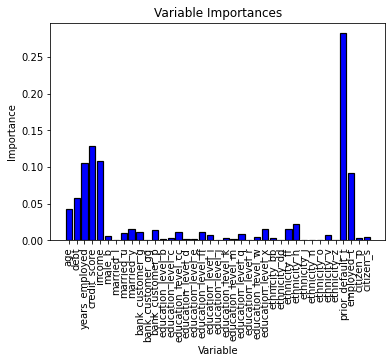

In [83]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');